In [1]:
%pylab inline
plt.style.use('dark_background')
# plt.style.use('seaborn-whitegrid')
pylab.rcParams['figure.figsize'] = (20.5, 20.5)
matplotlib.rcParams['animation.embed_limit'] = 2**128

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Potential functions
def force_goal(x, y, goal):
    goal_x, goal_y, k_goal = goal
    Fx_goal, Fy_goal = k_goal * (goal_x - x), k_goal *(goal_y - y)
    return Fx_goal, Fy_goal

def force_obstacle(x, y, obstacle):
    (obs_x, obs_y, k_obs) = obstacle
    dist_x, dist_y = x - obs_x, y - obs_y
    dist_obs = np.hypot(dist_x, dist_y)
    Fx_obs = (dist_x / dist_obs) * k_obs / dist_obs ** 3
    Fy_obs = (dist_y / dist_obs) * k_obs / dist_obs ** 3

    return Fx_obs, Fy_obs 

def total_force(x, y, goal, obstacles):
    Fx, Fy = force_goal(x, y, goal)

    for obs in obstacles:
        Fo_x, Fo_y = force_obstacle(x, y, obs)
        Fx += Fo_x
        Fy += Fo_y
    return Fx, Fy

In [3]:
 def plot_vector_field(ax=plt, fmax = 1):
    X, Y = np.meshgrid(np.arange(-10, 10, .5), np.arange(-10, 10, .5))

    # Vector field of the forces
    Fx, Fy = total_force(X, Y, goal, obstacles)

    # For visualization
    F_m = np.hypot(Fx, Fy)
    Fx[F_m > fmax], Fy[F_m > fmax] = None, None
    # Plot
    # quiver(X, Y, Fx, Fy,  F_m, color='0.4', scale=None)
    ax.quiver(X, Y, Fx, Fy, color='0.4', scale=None)
    

    

def simulate(q, goal, obstacles, num_steps=200, delta_time=1):
    trajectory = []
    for i in range(num_steps):
        force = total_force(q[0], q[1], goal, obstacles)
        # Robot velocity follows the force vector
        vel = np.array(force)
        # Integrate
        q += vel * delta_time
        trajectory.append(np.copy(q))

    
    return np.array(trajectory)

(-10.0, 10.0)

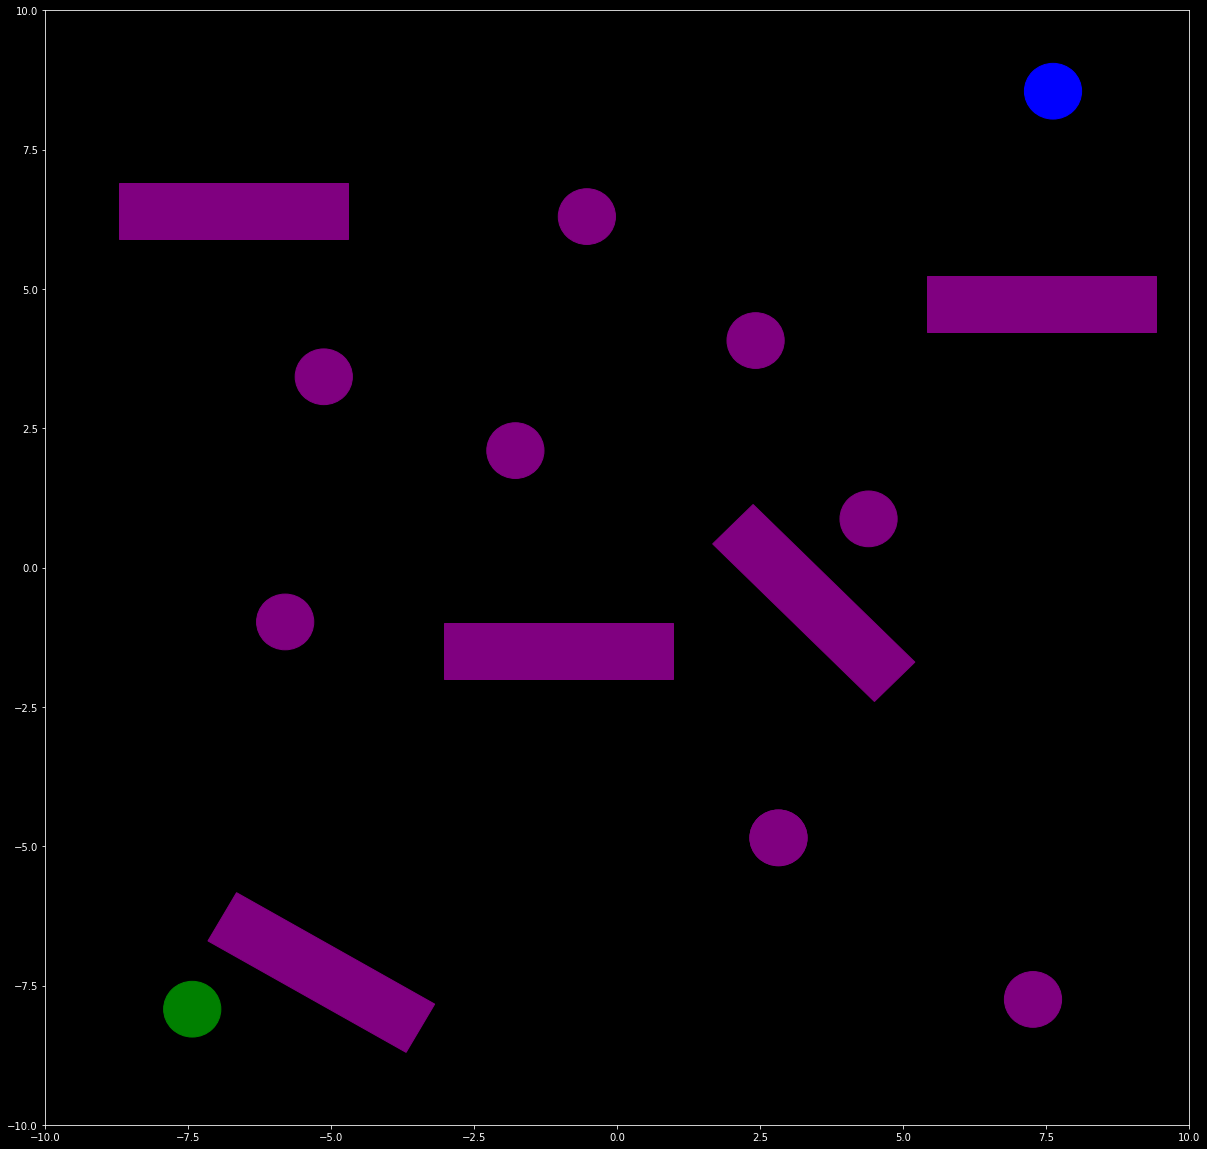

In [4]:
fig, ax = plt.subplots()

circle1 = plt.Circle((2.425, 4.075), 0.5, color='purple')
circle2 = plt.Circle((-.5250, 6.3), 0.5, color='purple')
circle3 = plt.Circle((-5.125, 3.4250), 0.5, color='purple')
circle4 = plt.Circle((-1.7750,2.1), 0.5, color='purple')
circle5 = plt.Circle((4.4, .875), 0.5, color='purple')
circle6 = plt.Circle((-5.8, -.975), 0.5, color='purple')
circle7 = plt.Circle((2.8250, -4.850), 0.5, color='purple')
circle8 = plt.Circle((2.8250, -4.850), 0.5, color='purple')
circle9 = plt.Circle((7.2750, -7.750), 0.5, color='purple')

goalCircle = plt.Circle((-7.425, -7.9250), 0.5, color='green')
startCircle = plt.Circle((7.6250, 8.55), 0.5, color='blue')

rect1 = plt.Rectangle((7.425-2, 4.725-.5), 4, 1, color='purple')
rect2 = plt.Rectangle((-6.7-2, 6.4-.5), 4, 1, color='purple')
rect3 = plt.Rectangle((2.725-2*cos(-45), 0-.5*sin(-45)), 4, 1, -45,color='purple')
rect4 = plt.Rectangle((-1.025-2, -1.5-.5), 4, 1, color='purple')
rect5 = plt.Rectangle((-5.15-2, -6.2-.5), 4, 1, -30, color='purple')

2.725, 0
-1.025, -1.5
-5.15, -6.2
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle4)
ax.add_artist(circle5)
ax.add_artist(circle6)
ax.add_artist(circle7)
ax.add_artist(circle8)
ax.add_artist(circle9)
ax.add_artist(goalCircle)
ax.add_artist(startCircle)
ax.add_artist(rect1)
ax.add_artist(rect2)
ax.add_artist(rect3)
ax.add_artist(rect4)
ax.add_artist(rect5)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

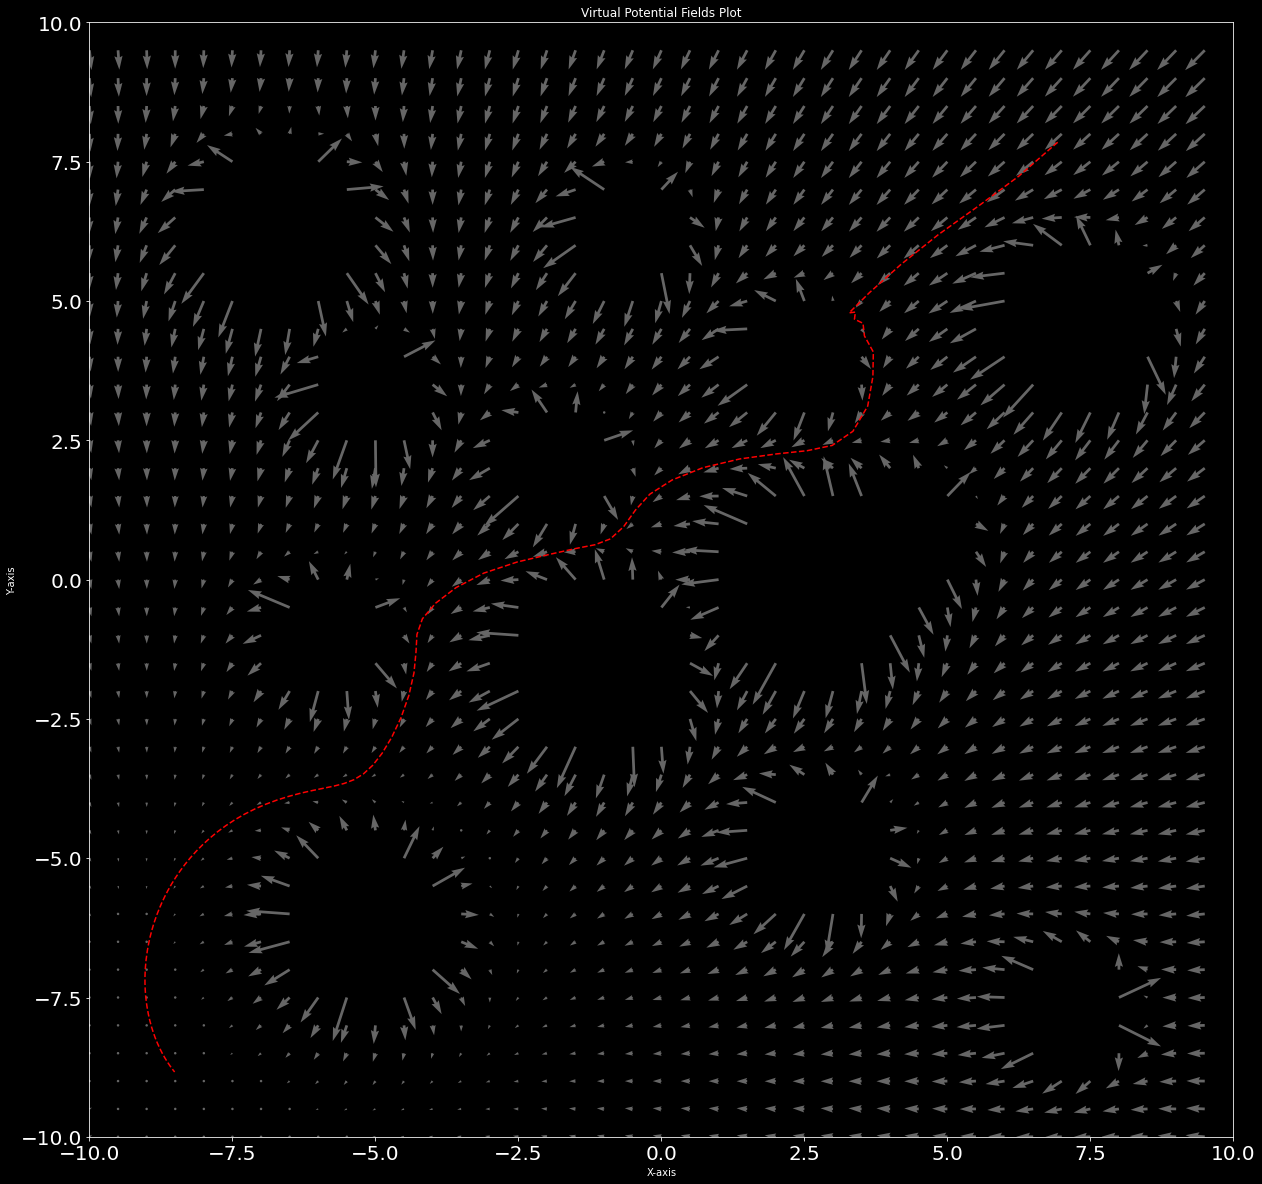

In [5]:
# Goal
goal = [-7.4, -7.925, 0.025]
p = goal
# Obstacles (x, y, k), where k is the rejection multiplier
obstacles = [[7.425, 4.725, 2],
             [2.425, 4.075, .6],
             [-.5250, 6.3, .6],
             [-6.7, 6.4, 2.25],
             [-5.125, 3.4250, .6],
             [-1.7750,2.1, .6],
             #Cuboid0
             [2.725, 0, 3.7],
             [4.4, .875, .6],
             [-1.025, -1.5, 3],
             [-5.8, -.975, .6],
             [2.8250, -4.850, .6],
             [-5.15, -6.2, 2.25],
             [2.8250, -4.850, .6],
             [7.2750, -7.750, .6],
             ]


# Initial location
q = np.array((7.6250, 8.55))




# fig, ax = plt.subplots()
trajectory = simulate(q, goal, obstacles, num_steps=200, delta_time=1.9)

plot(trajectory[:,0], trajectory[:,1], 'r--')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Virtual Potential Fields Plot")
# plt.gca().invert_yaxis()
plt.tick_params(labelsize=20)
plt.rcParams["font.size"] = "25"

plot_vector_field()

#Plot start Circle
# ax.add_artist(plt.Circle(((7.6250, 8.55)), radius=.2, color ="red"))
# #Plot goal Circle
# ax.add_artist(plt.Circle((-7.425, -7.9250), radius=.2, color ="blue"))



In [6]:
# import matplotlib.pyplot as plt
# from matplotlib import animation
# from JSAnimation import IPython_display    
# from IPython.display import HTML


# # trajectory = simulate(q, goal, obstacles, num_steps=200, delta_time=1)
# print(len(trajectory))
# fig, ax = plt.subplots()

# def animate(t):
#     # print (t)
#     ax.clear()
#     # Goal
#     ax.plot(goal[0], goal[1], 'gx')

#     # Tail
#     tail = t-30 if t-30 > 0 else 0
#     ax.plot(trajectory[tail:t,0], trajectory[tail:t,1], 'y-')
#     # Robot
#     ax.plot(trajectory[t,0], trajectory[t,1], 'ro')
# #     print(t)
#     plot_vector_field(ax)


# anim = animation.FuncAnimation(fig, animate, frames=len(trajectory), interval=25)


# HTML(anim.to_jshtml())

In [7]:
import sim

In [8]:
class robot():
    
    def __init__(self, frame_name, motor_names=[], client_id=0):  
        # If there is an existing connection
        if client_id:
                self.client_id = client_id
        else:
            self.client_id = self.open_connection()
            
        self.motors = self._get_handlers(motor_names) 
        
        # Robot frame
        self.frame =  self._get_handler(frame_name)
            
        
    def open_connection(self):
        sim.simxFinish(-1)  # just in case, close all opened connections
        clientID = sim.simxStart('127.0.0.1', 19999, True, True, 5000, 5)  # Connect to CoppeliaSim 
        
        if clientID != -1:
            print('Robot connected')
        else:
            print('Connection failed')
        return clientID
        
    def close_connection(self):    
        sim.simxGetPingTime(self.client_id)  # Before closing the connection to CoppeliaSim, make sure that the last command sent out had time to arrive.
        sim.simxFinish(self.client_id)  # Now close the connection to CoppeliaSim:
        print('Connection closed')
    
    def isConnected(self):
        c,result = sim.simxGetPingTime(self.client_id)
        # Return true if the robot is connected
        return result > 0         
        
    def _get_handler(self, name):
        err_code, handler = sim.simxGetObjectHandle(self.client_id, name, sim.simx_opmode_blocking)
        return handler
    
    def _get_handlers(self, names):
        handlers = []
        for name in names:
            handler = self._get_handler(name)
            handlers.append(handler)
        
        return handlers

    def send_motor_velocities(self, vels):
        for motor, vel in zip(self.motors, vels):
            err_code = sim.simxSetJointTargetVelocity(self.client_id, 
                                                      motor, vel, sim.simx_opmode_streaming)      
            
    def set_position(self, position, relative_object=-1):
        if relative_object != -1:
            relative_object = self._get_handler(relative_object)        
        sim.simxSetObjectPosition(self.client_id, self.frame, relative_object, position, sim.simx_opmode_oneshot)
        
    def simtime(self):
        return sim.simxGetLastCmdTime(self.client_id)
    
    def get_position(self, relative_object=-1):
        # Get position relative to an object, -1 for global frame
        if relative_object != -1:
            relative_object = self._get_handler(relative_object)
        res, position = sim.simxGetObjectPosition(self.client_id, self.frame, relative_object, sim.simx_opmode_blocking)        
        return array(position)
    
    def get_object_position(self, object_name):
        # Get Object position in the world frame
        err_code, object_h = sim.simxGetObjectHandle(self.client_id, object_name, sim.simx_opmode_blocking)
        res, position = sim.simxGetObjectPosition(self.client_id, object_h, -1, sim.simx_opmode_blocking)
        return array(position)
    
    def get_object_relative_position(self, object_name):        
        # Get Object position in the robot frame
        err_code, object_h = sim.simxGetObjectHandle(self.client_id, object_name, sim.simx_opmode_blocking)
        res, position = sim.simxGetObjectPosition(self.client_id, object_h, self.frame, sim.simx_opmode_blocking)
        return array(position)

In [9]:
def follow_traj(traj):
    time_steps = len(traj)
    tf = len(traj)
    print(tf)
    print(type(traj))
    for pos in traj:
#         print(t)
        dest = np.insert(pos, 2, 0.02)
        print(dest)
        disk.set_position(dest)
        robot_position = r.get_position()
        u = dest - robot_position
        print(u)
        vx, vy, vz = u
        r.send_motor_velocities([-vy - vx, vy - vx, vy + vx, -vy + vx])
#         time.sleep(tf/200)
        time.sleep(1.9)


#         robot_position = r.get_position()

#         vx, vy, vz = u
#         


       

In [ ]:
motor_names = ['Omnirob_FLwheel_motor', 'Omnirob_FRwheel_motor', 'Omnirob_RRwheel_motor', 'Omnirob_RLwheel_motor']
r = robot('Omnirob', motor_names)
disk = robot('Disc', client_id=r.client_id)
follow_traj(trajectory)


Connection failed
200
<class 'numpy.ndarray'>
[6.92864122 7.85022176 0.02      ]
[6.92864122 7.85022176 0.02      ]
[6.24767432 7.24003424 0.02      ]
[6.24767432 7.24003424 0.02      ]
[5.54914597 6.70898977 0.02      ]
[5.54914597 6.70898977 0.02      ]
[4.84060911 6.19045329 0.02      ]
[4.84060911 6.19045329 0.02      ]
[4.18613452 5.65484728 0.02      ]
[4.18613452 5.65484728 0.02      ]
[3.63706268 5.14995406 0.02      ]
[3.63706268 5.14995406 0.02      ]
[3.28216083 4.78794434 0.02      ]
[3.28216083 4.78794434 0.02      ]
[3.39205466 4.80129522 0.02      ]
[3.39205466 4.80129522 0.02      ]
[3.37520665 4.67436292 0.02      ]
[3.37520665 4.67436292 0.02      ]
[3.52491988 4.60037454 0.02      ]
[3.52491988 4.60037454 0.02      ]
[3.54973759 4.3745318  0.02      ]
[3.54973759 4.3745318  0.02      ]
[3.70543592 4.08505406 0.02      ]
[3.70543592 4.08505406 0.02      ]
[3.69778708 3.64349401 0.02      ]
[3.69778708 3.64349401 0.02      ]
[3.60708003 3.11352148 0.02      ]
[3.607080

[-8.83448287 -8.26399378  0.02      ]
[-8.83448287 -8.26399378  0.02      ]
[-8.82568472 -8.28611941  0.02      ]
[-8.82568472 -8.28611941  0.02      ]
[-8.81699848 -8.30739081  0.02      ]
[-8.81699848 -8.30739081  0.02      ]
[-8.80843258 -8.32784199  0.02      ]
[-8.80843258 -8.32784199  0.02      ]
[-8.79999435 -8.34750561  0.02      ]
[-8.79999435 -8.34750561  0.02      ]
[-8.79169013 -8.36641307  0.02      ]
[-8.79169013 -8.36641307  0.02      ]
[-8.78352535 -8.38459449  0.02      ]
[-8.78352535 -8.38459449  0.02      ]
[-8.77550458 -8.40207884  0.02      ]
[-8.77550458 -8.40207884  0.02      ]
[-8.76763165 -8.4188939   0.02      ]
[-8.76763165 -8.4188939   0.02      ]
[-8.75990969 -8.43506634  0.02      ]
[-8.75990969 -8.43506634  0.02      ]
[-8.75234118 -8.45062176  0.02      ]
[-8.75234118 -8.45062176  0.02      ]
[-8.74492802 -8.46558473  0.02      ]
[-8.74492802 -8.46558473  0.02      ]
[-8.73767159 -8.47997881  0.02      ]
[-8.73767159 -8.47997881  0.02      ]
[-8.73057278